## Segmenting and Clustering Neighborhoods in Toronto

##### 2. Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

##### READ DATA

In [1]:
# Import pandas library
import pandas as pd

# Read file
filename = "TorontoFSA.csv"
df = pd.read_csv(filename)

In [2]:
df.sort_values(by=['Postcode'])
df

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
...,...,...,...
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West
285,M8Z,Etobicoke,South of Bloor


#### Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [3]:
df = df[df['Borough'] !="Not assigned"]
df

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
...,...,...,...
281,M8Z,Etobicoke,Kingsway Park South West
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West


#### If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.


In [4]:
pd.options.mode.chained_assignment = None
df.loc[df.Neighbourhood ==  "Not assigned", 'Neighbourhood'] = df.Borough 
df

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
...,...,...,...
281,M8Z,Etobicoke,Kingsway Park South West
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West


#### If More than one neighborhood  exist in one postal code area then COMBINE into one row with the neighborhoods separated with a comma

In [5]:
grouped_df = df.groupby(['Postcode','Borough'])['Neighbourhood'].apply(lambda x: ','.join(x)).reset_index()
grouped_df.sort_values(by=['Postcode'])

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village,Martin Grove Gardens,Richvie..."
101,M9V,Etobicoke,"Albion Gardens,Beaumond Heights,Humbergate,Jam..."


In [6]:
grouped_df.shape

(103, 3)

### ADD geographical coordinates of each postal code

### Read Geospatial_Coordinates file

In [7]:
# Read file
filename = "Geospatial_Coordinates.csv"
dfCoord = pd.read_csv(filename)

### Rename Postal Code to Postcode 

In [8]:
dfCoord = dfCoord.rename(columns={"Postal Code": "Postcode"})

### Merge two dataframes into one using common Postcode column

In [9]:
df_all = pd.merge(grouped_df, dfCoord, on='Postcode')

In [10]:
df_all.sort_values(by=['Postcode'])
df_all

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village,Martin Grove Gardens,Richvie...",43.688905,-79.554724
101,M9V,Etobicoke,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",43.739416,-79.588437


## Explore and cluster the neighborhoods in Toronto

In [11]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [35]:
# create map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[df_all['Latitude'][0], df_all['Longitude'][0]], zoom_start=10)

# add markers to map
for lat, lng, borough, postcode,neighborhood  in zip(df_all['Latitude'], df_all['Longitude'], df_all['Postcode'], df_all['Borough'], df_all['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

### KMeans Clustering by Geo Locations. We will perform Venue/experience Clusering later on

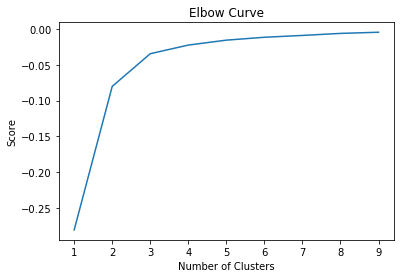

In [16]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_all[['Latitude']]
X_axis = df_all[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### The Elbow Curve graph levels off slowly after 4 clusters.

In [26]:
df_all.columns[3:5]

Index(['Latitude', 'Longitude'], dtype='object')

In [41]:
kclusters = 4

kmeans = KMeans(n_clusters = kclusters, init ='k-means++')

kmeans.fit(df_all[df_all.columns[3:5]]) # Compute k-means clustering.

df_all['cluster_label'] = kmeans.fit_predict(df_all[df_all.columns[3:5]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df_all[df_all.columns[3:5]]) # Labels of each point
df_all.head(10)

,Postcode,Borough,Neighbourhood,Latitude,Longitude,cluster_label
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353,2
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,2
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,2
3,M1G,Scarborough,Woburn,43.770992,-79.216917,2
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,2
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,2
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029,2
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577,2
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476,2
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848,2


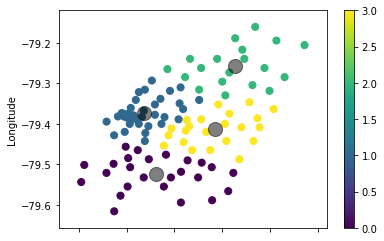

In [31]:
df_all.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [43]:
import numpy as np # library to handle data in a vectorized manner
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

### RUN KMEANS and MAP CLUSTERS

In [48]:
# create map
map_Toronto = folium.Map(location=[df_all['Latitude'][0], df_all['Longitude'][0]], zoom_start=8, width=500,height=500)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_all['Latitude'], df_all['Longitude'], df_all['Neighbourhood'], df_all['cluster_label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_Toronto)
       
map_Toronto